### Project Objective

The objective of this Sales Performance Analysis project is to analyze a company's sales data to uncover trends, patterns, and factors that influence sales performance. By leveraging statistical methods and visualizations, the project aims to provide actionable insights into how marketing campaigns, pricing strategies, and customer demographics impact sales. The ultimate goal is to identify opportunities for improving sales performance, optimizing marketing efforts, and enhancing profitability.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv('/home/manju/projects/superstore.csv')

#Display basic info about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

(None,
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
 3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         Category Sub-Category  

In [3]:

# Exploring the dataset
data_overview = {
    "data_shape": df.shape,
    "data_types": df.dtypes,
    "duplicate_values": df.duplicated().sum()
}

data_overview['duplicate_values']

0

#### Data Overview
- **Dataset Shape**: 
  - The dataset contains `9,994` rows and `21` columns.

- **Data Types**:
  - **Numerical Columns**: `Row ID`, `Postal Code`, `Sales`, `Quantity`, `Discount`, `Profit`
  - **Categorical Columns**:`Order ID`, `Order Date`, `Ship Date`, `Ship Mode`, `Customer ID`, `Customer Name`, `Segment`, `Country`, `City`, `State`, `Region`, `Product ID`, `Category`, `Sub-Category`, `Product Name`

- **Duplicate Values**:
  - The dataset has no duplicate values across all columns.


### Data Cleaning and Transformation

- Check for missing values and handle them if necessary.
- Convert data types (e.g., Order Date, Ship Date to datetime).


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Converting 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

missing_values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

- First, we checked for any missing values in the dataset to ensure data integrity. Missing values can affect the analysis and may need to be handled appropriately. After confirming that there were no missing values, we proceeded to convert the `Order Date` and `Ship Date` columns from object (string) types to datetime format. This conversion allows us to perform time-based analyses, such as identifying trends over time.

### Exploratory Data Analysis (EDA)
- We'll explore the sales and profit performance across different dimensions such as time, product categories, region, and customer segments.

#### **Monthly Sales and Profit Trends Analysis**

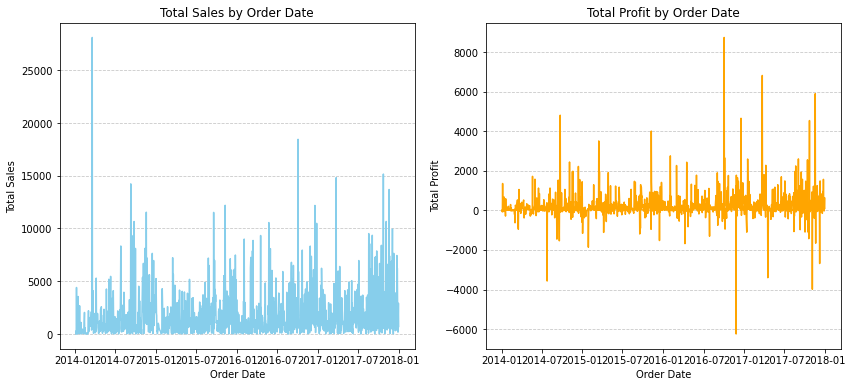

In [5]:
# Combined Sales and Profit by Order Date
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Group data by 'Order Date' and sum up the sales and profit for each order date
profit_by_order_date = df.groupby('Order Date')['Profit'].sum().sort_index()
sales_by_order_date = df.groupby('Order Date')['Sales'].sum().sort_index()

# Sales by Order Date
axes[0].plot(sales_by_order_date.index, sales_by_order_date.values, color='skyblue', linewidth=1.5)
axes[0].set_title('Total Sales by Order Date')
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Total Sales')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Profit by Order Date
axes[1].plot(profit_by_order_date.index, profit_by_order_date.values, color='Orange', linewidth=1.5)
axes[1].set_title('Total Profit by Order Date')
axes[1].set_xlabel('Order Date')
axes[1].set_ylabel('Total Profit')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Trends Over Time:**
- There are noticeable ups and downs in sales and profit over time, with some periods where sales spike without a corresponding increase in profit. This could be due to promotions or discounts that boost sales but not necessarily profit.
- At times, profit dips even when sales are steady, indicating potential cost management issues that need to be addressed.

In [6]:
# Resample the data to monthly frequency
monthly_sales = df['Sales'].resample('M').sum()
monthly_profit = df['Profit'].resample('M').sum()

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Monthly Sales', color='blue')
plt.plot(monthly_profit, label='Monthly Profit', color='red')

# Adding titles and labels
plt.title('Time Series Analysis of Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

**Sales Trend**

Sales data reveals significant fluctuations throughout the period, with a clear upward trend from 2014 to 2018. There are noticeable peaks and troughs, suggesting variability and potential seasonality, particularly towards the end of each year. The most prominent spike occurs at the end of 2017, which could indicate the impact of holiday sales or promotional events.

**Profit Trend**

Profits remain much more stable compared to sales, showing less variation over time. Despite some minor fluctuations, profit levels are consistently lower than sales, suggesting thin profit margins. This disparity indicates that increases in sales do not translate proportionately into higher profits, possibly due to high operating costs or aggressive pricing strategies.

**Relationship Between Sales and Profit**

Despite the increase in sales, especially in late 2017, profits don't rise proportionally, pointing to issues like high costs, operational expenses, or heavy discounts affecting margins. This indicates a need to review cost management and pricing strategies to improve profitability.

#### **Profitability by Segment, Category, and Region**

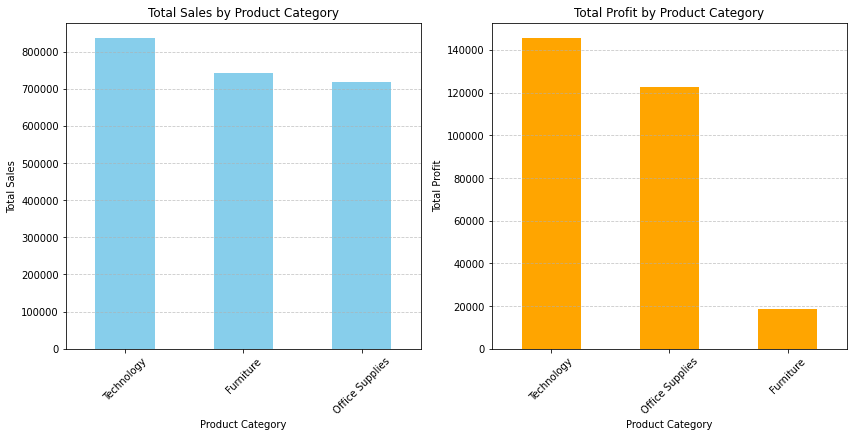

In [ ]:
# Combined Sales and Profit by Category
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Group data by 'Category' and sum up the sales and profit for each segment
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Sales by Category
sales_by_category.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales by Product Category')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Total Sales')
axes[0].set_xticks(range(len(sales_by_category.index)))
axes[0].set_xticklabels(sales_by_category.index, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Profit by Category
profit_by_category.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Profit by Product Category')
axes[1].set_xlabel('Product Category')
axes[1].set_ylabel('Total Profit')
axes[1].set_xticks(range(len(profit_by_category.index)))
axes[1].set_xticklabels(profit_by_category.index, rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Category Performance:**
- **Technology** is the standout category with the highest sales and profit, suggesting it's a strong area for the business both in terms of demand and profitability.
- **Office Supplies** also perform well in sales but don't translate to the same level of profit, likely due to lower margins or higher costs.
- **Furniture** shows good sales but has much lower profit compared to Technology and Office Supplies, indicating potential issues with pricing or cost structure.

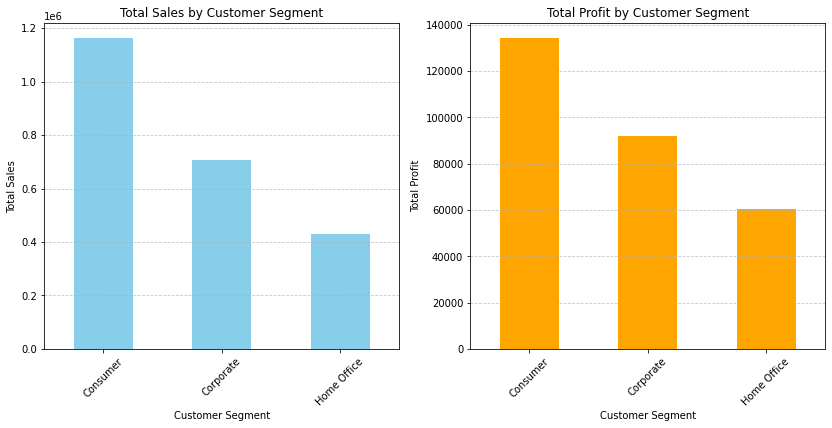

In [ ]:
# Combined Sales and Profit by Segment
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Group data by 'Segment' and sum up the sales and profit for each segment
profit_by_segment = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Sales by Segment
sales_by_segment.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales by Customer Segment')
axes[0].set_xlabel('Customer Segment')
axes[0].set_ylabel('Total Sales')
axes[0].set_xticks(range(len(sales_by_segment.index)))
axes[0].set_xticklabels(sales_by_segment.index, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Profit by Segment
profit_by_segment.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Profit by Customer Segment')
axes[1].set_xlabel('Customer Segment')
axes[1].set_ylabel('Total Profit')
axes[1].set_xticks(range(len(profit_by_segment.index)))
axes[1].set_xticklabels(profit_by_segment.index, rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Customer Segment Insights:**
- The **Consumer** segment is the clear leader in both sales and profit, which means this group drives a significant portion of the business's success. There’s likely strong customer loyalty and repeat purchases here.
- The **Corporate** segment, while having decent sales, contributes less to profit, suggesting that perhaps there are more discounts or lower pricing strategies in play.
- **Home Office** lags behind in both sales and profit, suggesting this segment might not be a primary focus or doesn’t have as much market potential.

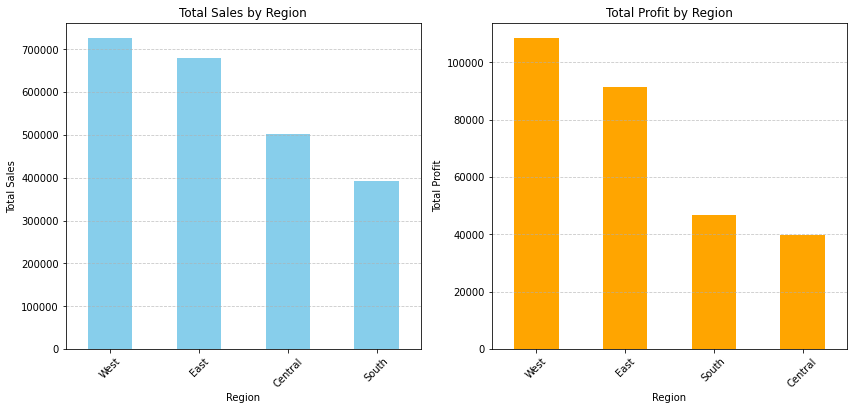

In [ ]:
# Combined Sales and Profit by Region
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Group data by 'Region' and sum up the sales and profit for each region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Sales by Region
sales_by_region.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Sales')
axes[0].set_xticks(range(len(sales_by_region.index)))
axes[0].set_xticklabels(sales_by_region.index, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Profit by Region
profit_by_region.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Profit by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Profit')
axes[1].set_xticks(range(len(profit_by_region.index)))
axes[1].set_xticklabels(profit_by_region.index, rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Regional Differences:**
- **West and East** regions are strong performers, with both high sales and profit, suggesting good market coverage and efficient operations.
- On the other hand, **Central and South** regions show lower numbers, especially in profit. This might point to higher operational costs or less effective sales strategies in these areas.

#### **Impact of Discounts on Profit**

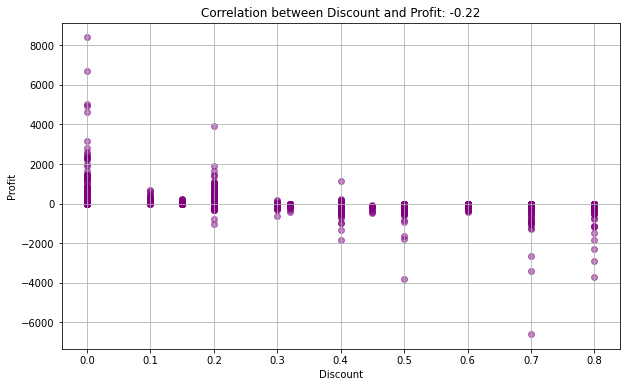

In [ ]:
# Correlation between Discount and Profit
discount_profit_corr = df['Discount'].corr(df['Profit'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5, color='purple')
plt.title(f'Correlation between Discount and Profit: {discount_profit_corr:.2f}')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


**Insights:**

**Correlation Analysis:** There is a negative correlation between discounts and profits, meaning that higher discounts tend to lower profits. While discounts can increase sales, they often reduce profitability.

**Strategic Recommendation:** The company should strategically manage discounting to boost sales without significantly affecting profit margins.